# 分类算法的评价

评论算法的好坏：

* 回归问题：MSE, MAE, RMSE, R Squared
* 分类问题：分类准确度

## 分类准确度的问题
一个癌症预测系统，输入体测信息，可以判断是否由癌症  
预测准确度：99.9%  
是好？是坏？  
如果癌症产生的概率只有0.1%  
我们的系统预测所有人都是健康，即可达到99.9%的准确率

一个癌症预测系统，输入体测信息，可以判断是否由癌症  
预测准确度：99.9%  
如果癌症产生的概率只有0.01%  
我们的系统预测所有人都是健康，即可达到99.99%的准确率

对于极度偏斜（skewed data）的数据，  
只使用分类准确度是远远不够的  


**使用混淆矩阵做进一步的分析**  
<img src ='1.png' height= 500 width = 500>

* Precision 精准率= TP/(TP+FP)   
在所有你认为positive的数据中，有多少真的是positive？
* Recall 召回率= TP/(TP+FN)  
在所有positive的数据中，有多少被你正确地识别出来（是positive）？

# 实现混淆矩阵，精准率和召回率

In [31]:
import numpy as np
from sklearn import datasets

In [32]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

#需要skewed data

y[digits.target == 9] = 1
y[digits.target != 9] = 0

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
log_reg.score(X_test,y_test)

C:\Users\Ruojun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [35]:
y_log_predict = log_reg.predict(X_test)

In [36]:
def TN(y_true, y_predict):
    assert len(y_true)==len(y_predict)
    return np.sum((y_true==0) & (y_predict==0))

TN(y_test,y_log_predict)

403

In [37]:
def FP(y_true, y_predict):
    assert len(y_true)==len(y_predict)
    return np.sum((y_true==0) & (y_predict==1))

FP(y_test,y_log_predict)

2

In [38]:
def FN(y_true, y_predict):
    assert len(y_true)==len(y_predict)
    return np.sum((y_true==1) & (y_predict==0))

FN(y_test,y_log_predict)

9

In [39]:
def TP(y_true, y_predict):
    assert len(y_true)==len(y_predict)
    return np.sum((y_true==1) & (y_predict==1))

TP(y_test,y_log_predict)

36

In [40]:
def confusion_matrix(y_true,y_predict):
    return np.array([
        [TN(y_test,y_log_predict),FP(y_test,y_log_predict)],
        [FN(y_test,y_log_predict),TP(y_test,y_log_predict)]
    ])

confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]])

In [41]:
def precision_score(y_true,y_predict):
    tp = TP(y_true, y_predict)
    fp = FP(y_true, y_predict)
    try:
        return tp /(tp+fp)
    except:
        return 0.0

precision_score(y_test, y_log_predict)

0.9473684210526315

In [42]:
def recall_score(y_true,y_predict):
    tp = TP(y_true, y_predict)
    fn = FN(y_true, y_predict)
    try:
        return tp /(tp+fn)
    except:
        return 0.0

recall_score(y_test, y_log_predict)

0.8

### scikit-learn中的混淆矩阵，精准率和召回率

In [43]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_log_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [44]:
from sklearn.metrics import precision_score

precision_score(y_test,y_log_predict)

0.9473684210526315

In [45]:
from sklearn.metrics import recall_score

recall_score(y_test,y_log_predict)

0.8

有时候我们更注重精准率：如股票预测
有时候我们注重召回率：如病人诊断

## F1 Score
二者都兼顾：F1 Score  
是precision和recall的调和平均值  
F1 = 2 * precision * recall / (precision + recall)  
1/F1 = 1/2 * (1/precision + 1/recall)

In [1]:
import numpy as np

In [2]:
def f1_score(precision,recall):
    try:
        return 2 * precision * recall / (precision + recall)
    except:
        return 0.0

In [3]:
precision = 0.5
recall = 0.5
f1_score(precision,recall)

0.5

In [4]:
precision = 0.1
recall = 0.9
f1_score(precision,recall)

0.18000000000000002

In [5]:
precision = 0
recall = 1
f1_score(precision,recall)

0.0

## 精准率和召回率的平衡

In [8]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

y[digits.target ==9] = 1
y[digits.target !=9] = 0

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=666)

In [11]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg.score(X_test, y_test)

C:\Users\Ruojun\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9755555555555555

In [13]:
y_predict = log_reg.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_predict)

array([[403,   2],
       [  9,  36]], dtype=int64)

In [15]:
from sklearn.metrics import recall_score

recall_score(y_test, y_predict)

0.8

In [16]:
from sklearn.metrics import f1_score

f1_score(y_test, y_predict)

0.8674698795180723

In [18]:
log_reg.decision_function(X_test)

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 , -66.25139191, -51.09600903,
       -31.49348767, -46.05335761, -38.67875653, -29.80471251,
       -37.58849546, -82.57569732, -37.81903096, -11.01165509,
        -9.17439784, -85.13004331, -16.71617974, -46.23725224,
        -5.32992784, -47.91762441, -11.66729524, -39.1960157 ,
       -25.25293243, -14.3664722 , -16.99783066, -28.91904826,
       -34.33940562, -29.47603768,  -7.85812845,  -3.82094912,
       -24.08161558, -22.16362592, -33.61218699, -23.14023293,
       -26.9180406 , -62.3893701 , -38.85690022, -66.77259733,
       -20.14482853, -17.47886658, -18.06799819, -22.22224569,
       -29.62302848, -19.73171824,   1.49552053,   8.32079827,
       -36.29307324, -42.50732725, -25.90460192, -34.98959422,
        -8.42010631, -50.04725431, -51.48208247,  19.88958588,
        -8.91888462, -31.99343636, -11.66099193,  -0.47

In [19]:
log_reg.decision_function(X_test)[:10]

array([-22.05700117, -33.02940957, -16.21334087, -80.3791447 ,
       -48.25125396, -24.54005629, -44.39168773, -25.04292757,
        -0.97829292, -19.7174399 ])

In [20]:
log_reg.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
decision_scores = log_reg.decision_function(X_test)

In [22]:
np.min(decision_scores)

-85.68608522646575

In [23]:
np.max(decision_scores)

19.8895858799022

In [25]:
y_predict_2 = np.array(decision_scores >=5, dtype='int')

In [26]:
confusion_matrix(y_test, y_predict_2)

array([[404,   1],
       [ 21,  24]], dtype=int64)

In [46]:
precision_score(y_test, y_predict_2)

0.96

In [47]:
recall_score(y_test, y_predict_2)

0.5333333333333333

In [49]:
y_predict_3 = np.array(decision_scores >=-5, dtype='int')

In [50]:
confusion_matrix(y_test, y_predict_3)

array([[390,  15],
       [  5,  40]], dtype=int64)

In [51]:
precision_score(y_test, y_predict_3)

0.7272727272727273

In [52]:
recall_score(y_test, y_predict_3)

0.8888888888888888

In [54]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [55]:
# 绘制曲线
precisions = []
recalls = []
thresholds = np.arange(np.min(decision_scores),np.max(decision_scores))
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype='int')
    precisions.append(precision_score(y_test, y_predict))
    recalls.append(recall_score(y_test,y_predict))

In [57]:
import matplotlib.pyplot as plt

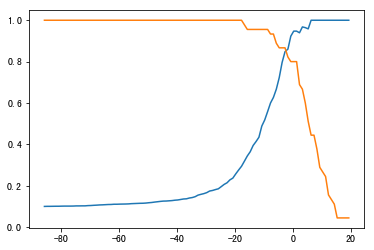

In [58]:
plt.plot(thresholds, precisions)
plt.plot(thresholds, recalls)
plt.show()

## Precision-Recall曲线

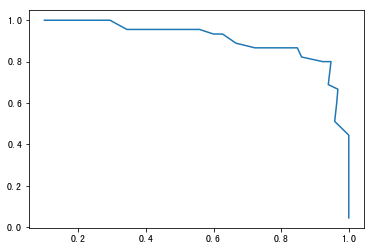

In [60]:
plt.plot(precisions,recalls)
plt.show()

## scikit-learn中的precision-recall曲线

In [63]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_test, decision_scores)

In [64]:
precisions.shape

(145,)

In [65]:
recalls.shape

(145,)

In [66]:
thresholds.shape

(144,)

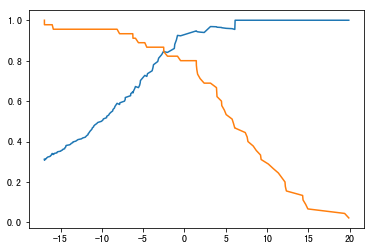

In [67]:
plt.plot(thresholds,precisions[:-1])
plt.plot(thresholds,recalls[:-1])

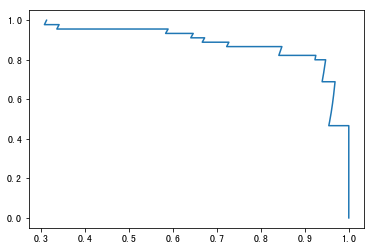

In [69]:
plt.plot(precisions,recalls)
plt.show()